In [27]:
# data processing
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data\Motor.csv", dtype=str)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437791 entries, 0 to 1972740
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CRASH DATE     437791 non-null  object        
 1   CRASH TIME     437791 non-null  object        
 2   BOROUGH        437791 non-null  object        
 3   ZIP_CODE       292630 non-null  object        
 4   LATITUDE       390641 non-null  object        
 5   LONGITUDE      390641 non-null  object        
 6   LOCATION       390641 non-null  object        
 7   STREET_ON      370513 non-null  object        
 8   STREET_CROSS   285788 non-null  object        
 9   STREET_OFF     48738 non-null   object        
 10  TOTAL_INJURED  437791 non-null  int32         
 11  TOTAL_KILLED   437791 non-null  int32         
 12  PED_INJURED    437791 non-null  int32         
 13  PED_KILLED     437791 non-null  int32         
 14  CYC_INJURED    437791 non-null  int32         
 15 

In [4]:
# Column header titles cleaning/renaming

# Number of persons injured is the total of injured (pedestrians + cyclists + motorists)
# If the number is 0, it means 0 injures and 0 deaths in an incident, but it's still a record

df.rename(columns = {'ZIP CODE'          : 'ZIP_CODE',
                       'ON STREET NAME'    : 'STREET_ON',
                       'CROSS STREET NAME' : 'STREET_CROSS',
                       'OFF STREET NAME'   : 'STREET_OFF',
                       'NUMBER OF PERSONS INJURED'     : 'TOTAL_INJURED',
                       'NUMBER OF PERSONS KILLED'      : 'TOTAL_KILLED',
                       'NUMBER OF PEDESTRIANS INJURED' : 'PED_INJURED',
                       'NUMBER OF PEDESTRIANS KILLED'  : 'PED_KILLED',
                       'NUMBER OF CYCLIST INJURED'     : 'CYC_INJURED',
                       'NUMBER OF CYCLIST KILLED'      : 'CYC_KILLED',
                       'NUMBER OF MOTORIST INJURED'    : 'MOTO_INJURED',
                       'NUMBER OF MOTORIST KILLED'     : 'MOTO_KILLED',
                       'CONTRIBUTING FACTOR VEHICLE 1' : 'VEH_FACTOR_1',
                       'CONTRIBUTING FACTOR VEHICLE 2' : 'VEH_FACTOR_2',
                       'CONTRIBUTING FACTOR VEHICLE 3' : 'VEH_FACTOR_3',
                       'CONTRIBUTING FACTOR VEHICLE 4' : 'VEH_FACTOR_4',
                       'CONTRIBUTING FACTOR VEHICLE 5' : 'VEH_FACTOR_5',
                       'COLLISION_ID' : 'COLLISION_ID',
                       'VEHICLE TYPE CODE 1' : 'VEH_TYPE_1',
                       'VEHICLE TYPE CODE 2' : 'VEH_TYPE_2',
                       'VEHICLE TYPE CODE 3' : 'VEH_TYPE_3',
                       'VEHICLE TYPE CODE 4' : 'VEH_TYPE_4',
                       'VEHICLE TYPE CODE 5' : 'VEH_TYPE_5'},
           inplace = True)

In [5]:
# Missing values in columns
df.isna().sum()

CRASH DATE             0
CRASH TIME             0
BOROUGH           616772
ZIP_CODE          617010
LATITUDE          226909
LONGITUDE         226909
LOCATION          226909
STREET_ON         414927
STREET_CROSS      737347
STREET_OFF       1660887
TOTAL_INJURED         18
TOTAL_KILLED          31
PED_INJURED            0
PED_KILLED             0
CYC_INJURED            0
CYC_KILLED             0
MOTO_INJURED           0
MOTO_KILLED            0
VEH_FACTOR_1        6158
VEH_FACTOR_2      300406
VEH_FACTOR_3     1843611
VEH_FACTOR_4     1952174
VEH_FACTOR_5     1975019
COLLISION_ID           0
VEH_TYPE_1         12191
VEH_TYPE_2        365937
VEH_TYPE_3       1848361
VEH_TYPE_4       1953201
VEH_TYPE_5       1975267
dtype: int64

In [7]:
# Fill all blank values in column Borough
# If a value is NaN it will be NYC
df.loc[df['BOROUGH'].isnull(), 'BOROUGH'] = 'NYC'

In [8]:
df.isna().sum()

CRASH DATE             0
CRASH TIME             0
BOROUGH                0
ZIP_CODE          617010
LATITUDE          226909
LONGITUDE         226909
LOCATION          226909
STREET_ON         414927
STREET_CROSS      737347
STREET_OFF       1660887
TOTAL_INJURED         18
TOTAL_KILLED          31
PED_INJURED            0
PED_KILLED             0
CYC_INJURED            0
CYC_KILLED             0
MOTO_INJURED           0
MOTO_KILLED            0
VEH_FACTOR_1        6158
VEH_FACTOR_2      300406
VEH_FACTOR_3     1843611
VEH_FACTOR_4     1952174
VEH_FACTOR_5     1975019
COLLISION_ID           0
VEH_TYPE_1         12191
VEH_TYPE_2        365937
VEH_TYPE_3       1848361
VEH_TYPE_4       1953201
VEH_TYPE_5       1975267
dtype: int64

In [17]:
# Remove NaN from TOTAL INJURED
df = df.dropna(axis=0, subset=['TOTAL_INJURED'])
# Remove NaN from TOTAL KILLED
df = df.dropna(axis=0, subset=['TOTAL_KILLED'])

# Keep only > 0 values as df1
df1 = df[(df['TOTAL_INJURED'] > '0')]

# Keep only non-zero values as df2
df2 = df[(df['TOTAL_KILLED'] > '0')]

# Concatenate df1 and df2 and put it back as df; 0 values are now out
df = pd.concat([df1, df2])


In [18]:
# Combine DATE and TIME column to transform Series to DateTime needed for further analysis
df['DATE'] = df['CRASH DATE'] + ' ' + df['CRASH TIME']
# Convert string to DateTime
df['DATE'] = pd.to_datetime(df.DATE)

In [60]:
# Year filter
df['DATE_YEAR'] = pd.to_datetime(df['DATE']).dt.year

# Quarter filter
df['DATE_QUARTER'] = pd.to_datetime(df['DATE']).dt.quarter

# Month filter
df['DATE_MONTH'] = pd.to_datetime(df['DATE']).dt.month

# Day of the week filter
df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.weekday

df['Hour'] = pd.to_datetime(df['DATE']).dt.hour

0           2
1          11
7           8
14         23
16         20
           ..
1968588    17
1972193    23
1972194    15
1972195    13
1972740     2
Name: Hour, Length: 437791, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447499 entries, 0 to 1983241
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CRASH DATE     447499 non-null  object        
 1   CRASH TIME     447499 non-null  object        
 2   BOROUGH        447499 non-null  object        
 3   ZIP_CODE       298799 non-null  object        
 4   LATITUDE       399598 non-null  object        
 5   LONGITUDE      399598 non-null  object        
 6   LOCATION       399598 non-null  object        
 7   STREET_ON      378653 non-null  object        
 8   STREET_CROSS   291240 non-null  object        
 9   STREET_OFF     50306 non-null   object        
 10  TOTAL_INJURED  447499 non-null  object        
 11  TOTAL_KILLED   447499 non-null  object        
 12  PED_INJURED    447499 non-null  object        
 13  PED_KILLED     447499 non-null  object        
 14  CYC_INJURED    447499 non-null  object        
 15 

In [23]:
# the data of 2023 is not completely.
df = df.loc[(df['DATE_YEAR'] < 2023)]

In [50]:
df['TOTAL_INJURED'] = df['TOTAL_INJURED'].astype(int)
df['MOTO_INJURED'] = df['MOTO_INJURED'].astype(int)
df['PED_INJURED'] = df['PED_INJURED'].astype(int)
df['CYC_INJURED'] = df['CYC_INJURED'].astype(int)

df['TOTAL_KILLED'] = df['TOTAL_KILLED'].astype(int)
df['MOTO_KILLED'] = df['MOTO_KILLED'].astype(int)
df['PED_KILLED'] = df['PED_KILLED'].astype(int)
df['CYC_KILLED'] = df['CYC_KILLED'].astype(int)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437791 entries, 0 to 1972740
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CRASH DATE     437791 non-null  object        
 1   CRASH TIME     437791 non-null  object        
 2   BOROUGH        437791 non-null  object        
 3   ZIP_CODE       292630 non-null  object        
 4   LATITUDE       390641 non-null  object        
 5   LONGITUDE      390641 non-null  object        
 6   LOCATION       390641 non-null  object        
 7   STREET_ON      370513 non-null  object        
 8   STREET_CROSS   285788 non-null  object        
 9   STREET_OFF     48738 non-null   object        
 10  TOTAL_INJURED  437791 non-null  int32         
 11  TOTAL_KILLED   437791 non-null  object        
 12  PED_INJURED    437791 non-null  int32         
 13  PED_KILLED     437791 non-null  object        
 14  CYC_INJURED    437791 non-null  int32         
 15 

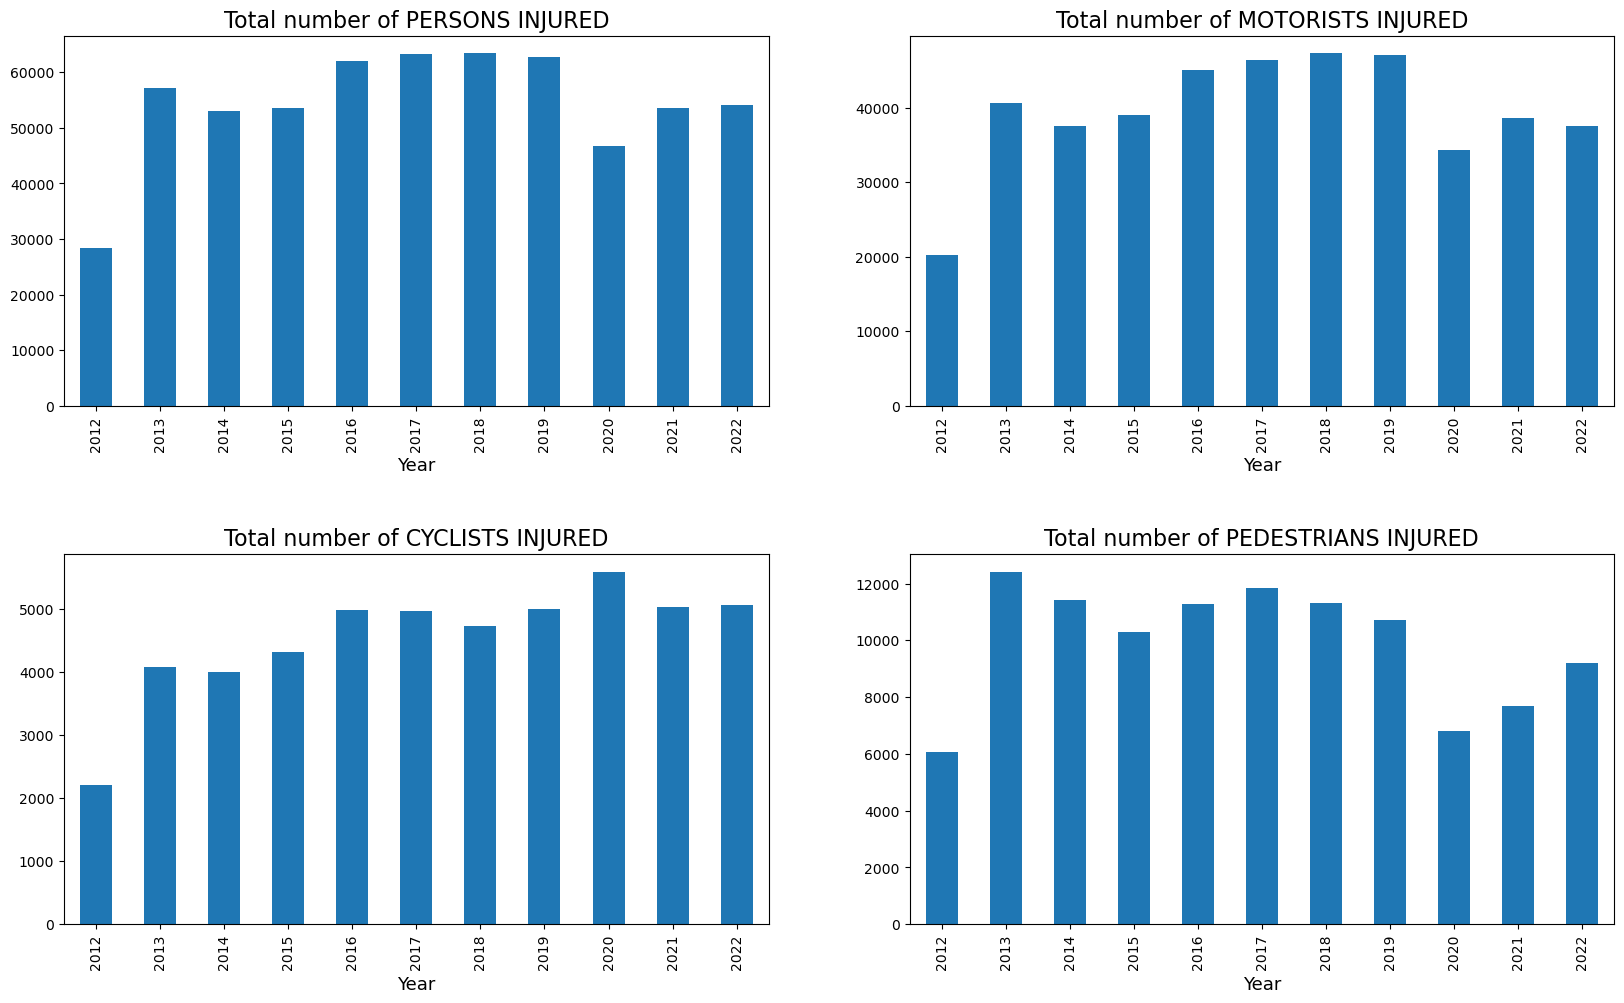

In [48]:
# Injured per year

plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

# Total number of PERSONS injured
plt.subplot(4, 2 ,1)
df.groupby('DATE_YEAR').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of MOTORISTS injured
plt.subplot(4, 2, 2)
df.groupby('DATE_YEAR').MOTO_INJURED.sum().plot.bar()
plt.title('Total number of MOTORISTS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of CYCLISTS injury
plt.subplot(4, 2 ,3)
df.groupby('DATE_YEAR').CYC_INJURED.sum().plot.bar()
plt.title('Total number of CYCLISTS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of PEDESTRIANS injured
plt.subplot(4, 2, 4)
df.groupby('DATE_YEAR').PED_INJURED.sum().plot.bar()
plt.title('Total number of PEDESTRIANS INJURED', fontsize=16)
plt.xlabel('Year', fontsize=13)

plt.show()

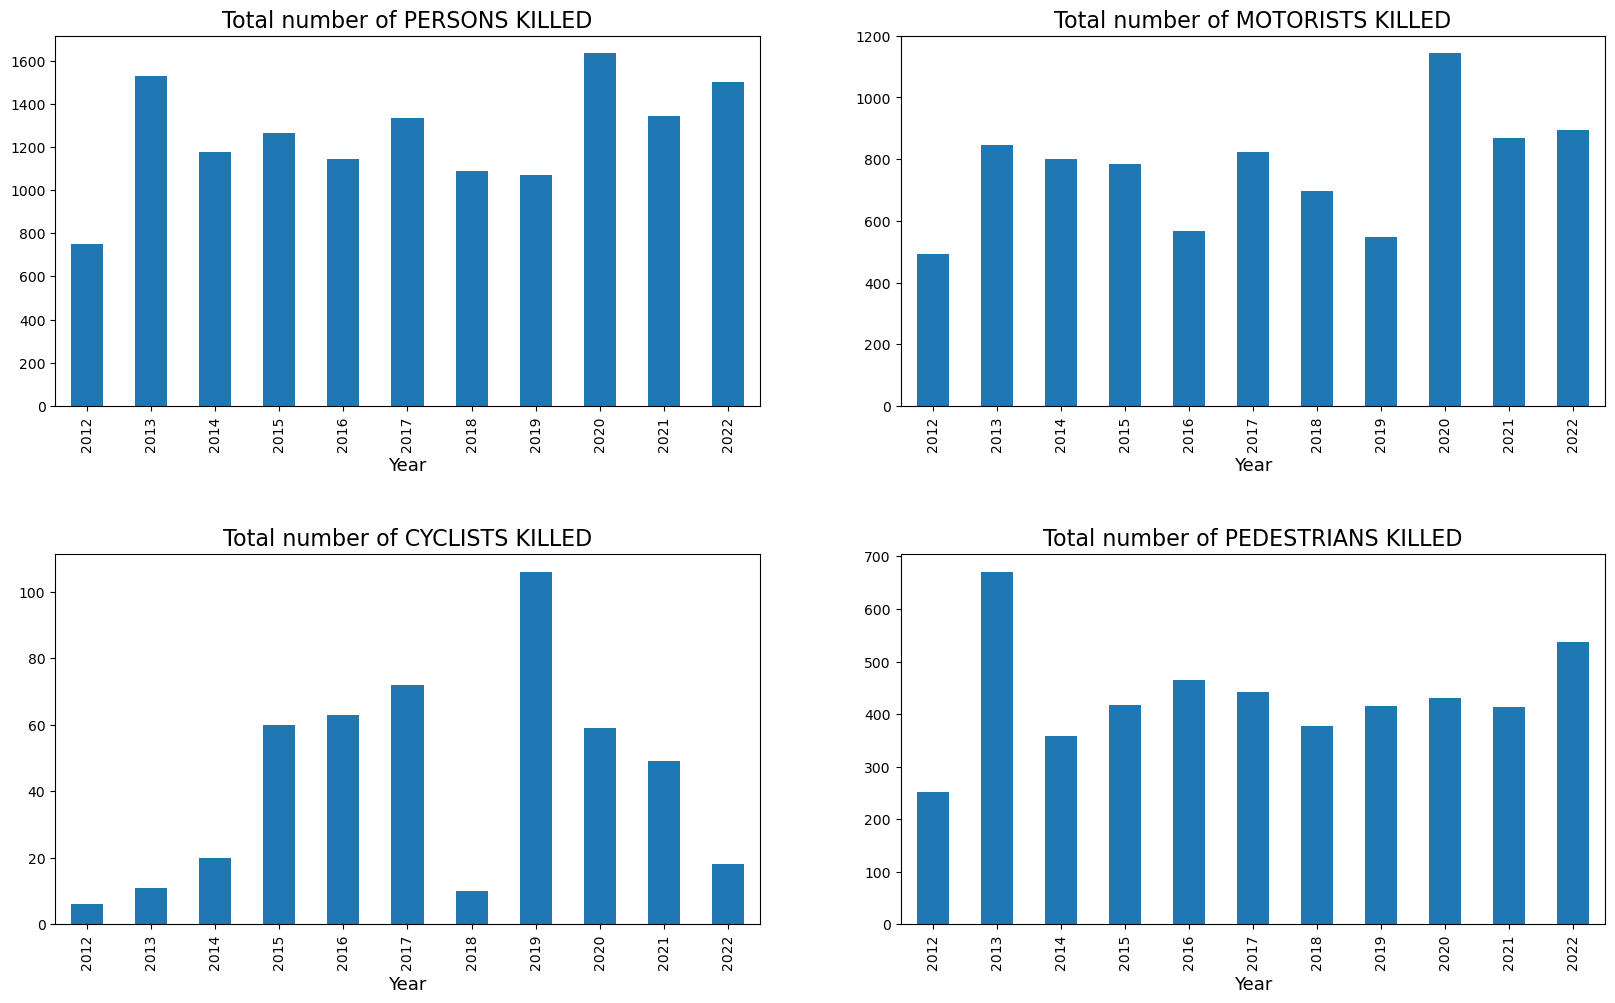

In [51]:
# Killed per year

plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

# Total number of PERSONS killed
plt.subplot(4, 2 ,1)
df.groupby('DATE_YEAR').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# TTotal number of MOTORISTS killed
plt.subplot(4, 2, 2)
df.groupby('DATE_YEAR').MOTO_KILLED.sum().plot.bar()
plt.title('Total number of MOTORISTS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of CYCLISTS killed
plt.subplot(4, 2 ,3)
df.groupby('DATE_YEAR').CYC_KILLED.sum().plot.bar()
plt.title('Total number of CYCLISTS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

# Total number of PEDESTRIANS killed
plt.subplot(4, 2, 4)
df.groupby('DATE_YEAR').PED_KILLED.sum().plot.bar()
plt.title('Total number of PEDESTRIANS KILLED', fontsize=16)
plt.xlabel('Year', fontsize=13)

plt.show()

Text(0.5, 1.0, 'Number of cyclist kill')

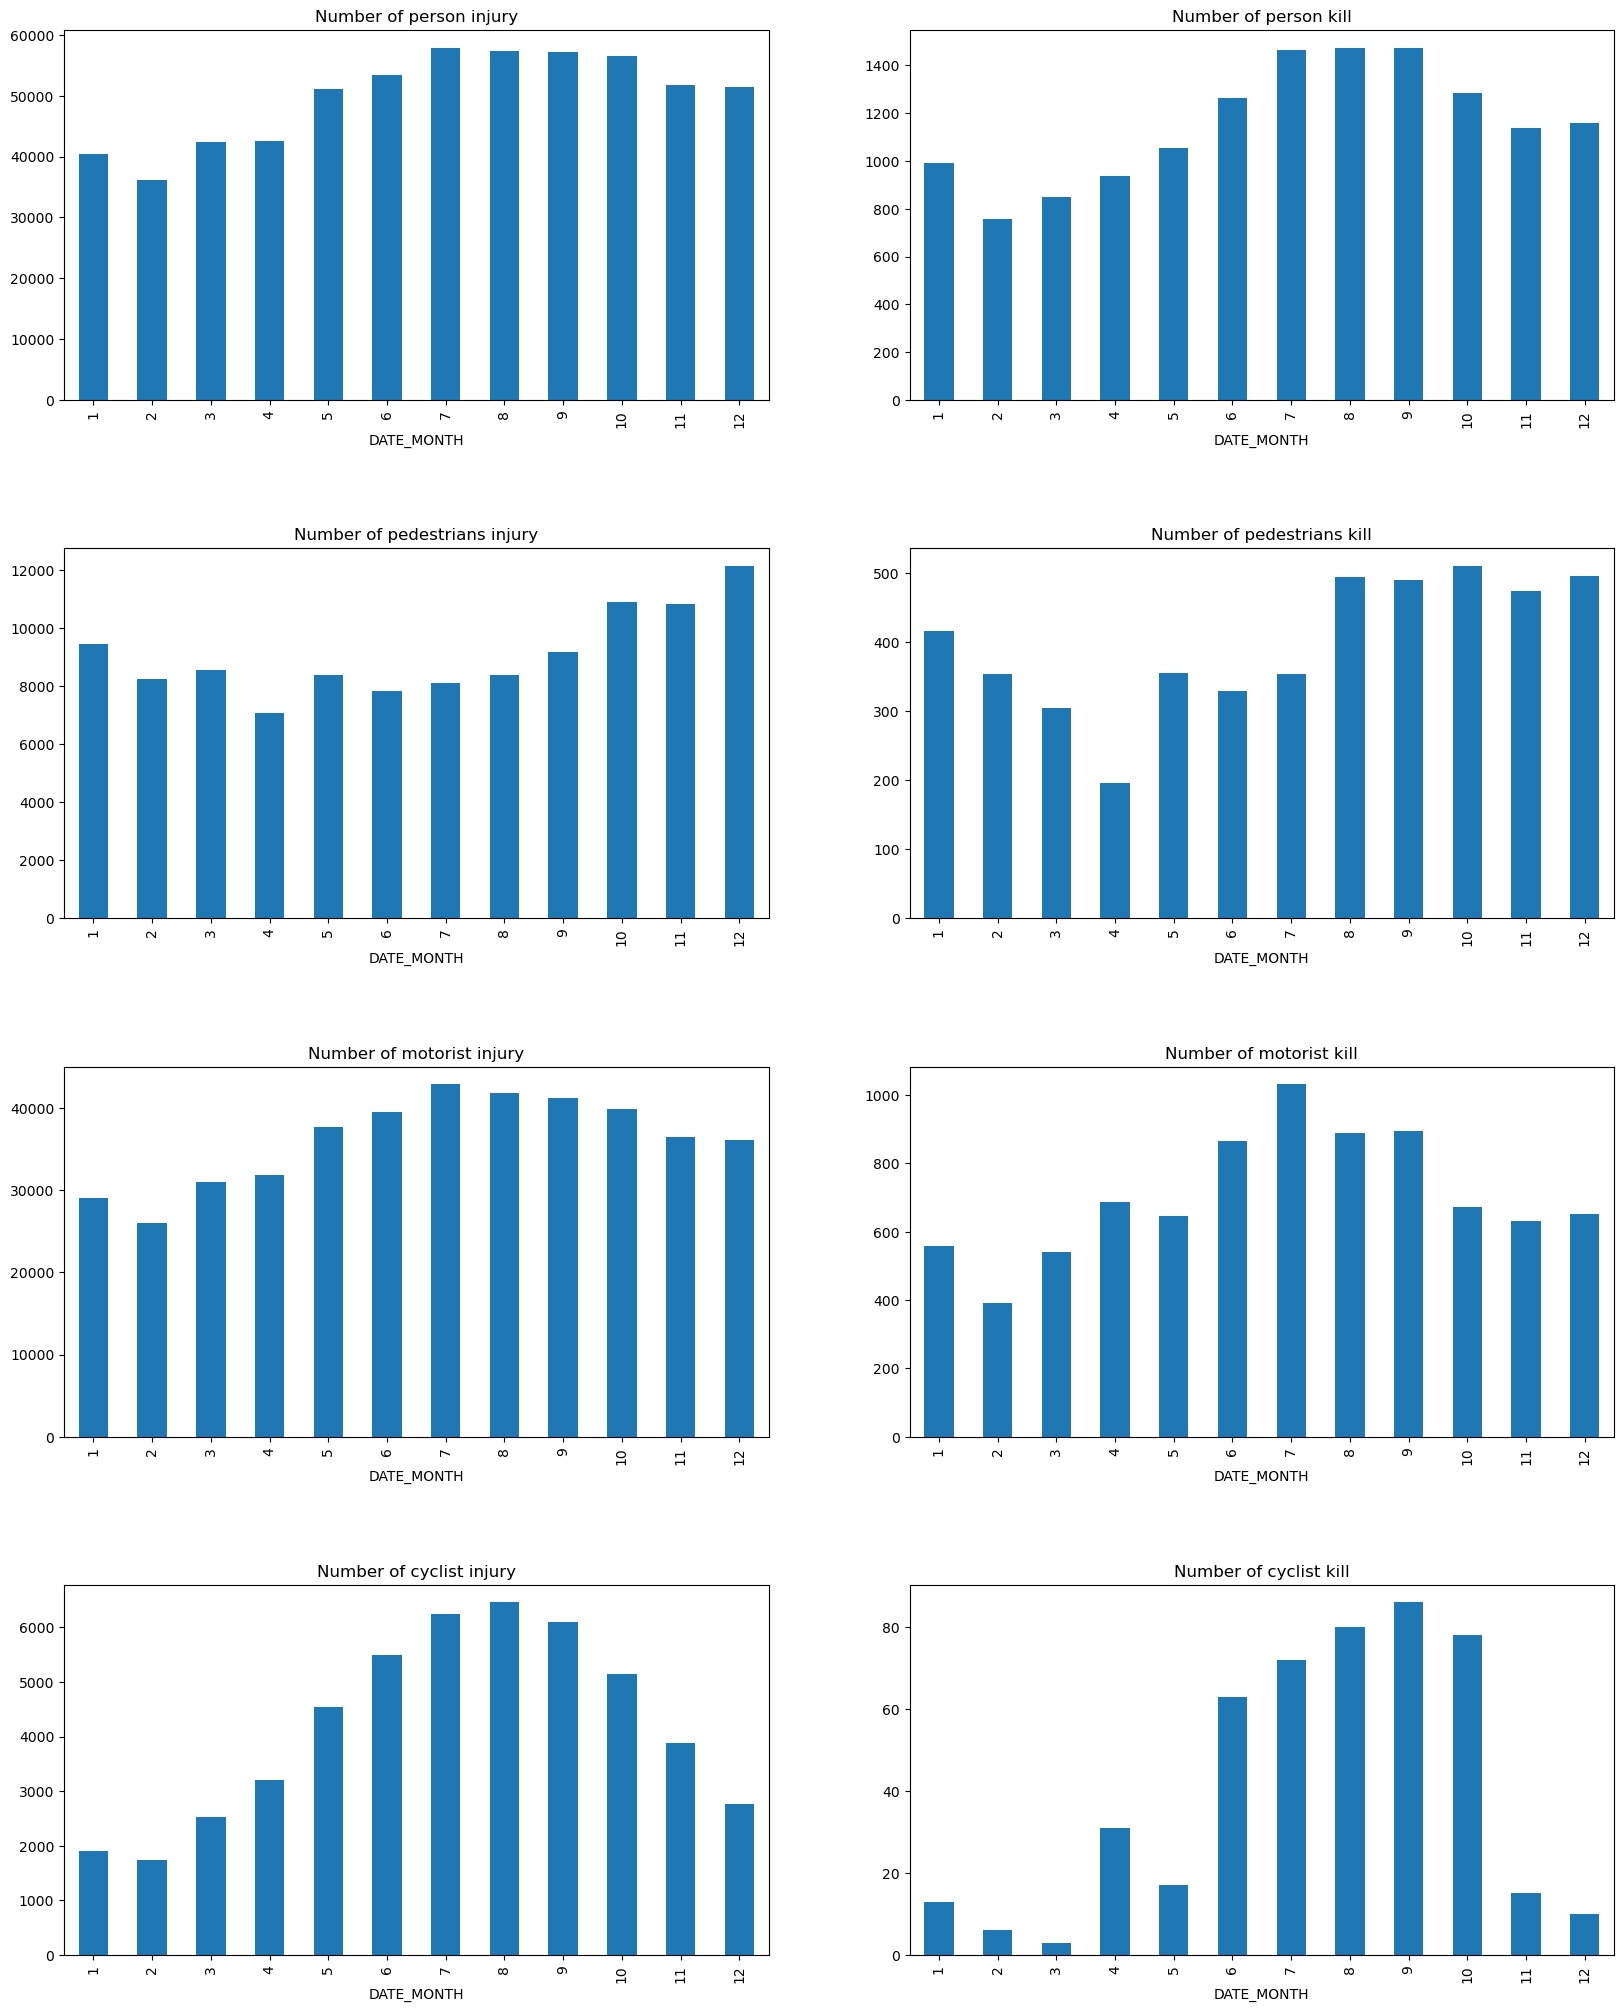

In [59]:
# Preliminary analysis
## Create bar plot by month

## Set subplot size and space
plt.figure(figsize=(20, 25)).subplots_adjust(hspace=0.4)
# plt.figure(figsize=(20, 25)).subplots_adjust(hspace = 0.4)

# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('DATE_MONTH').TOTAL_INJURED.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person kill by year
plt.subplot(4, 2, 2)
df.groupby('DATE_MONTH').TOTAL_KILLED.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('DATE_MONTH').PED_INJURED.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 4)
df.groupby('DATE_MONTH').PED_KILLED.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 5)
df.groupby('DATE_MONTH').MOTO_INJURED.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 6)
df.groupby('DATE_MONTH').MOTO_KILLED.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 7)
df.groupby('DATE_MONTH').CYC_INJURED.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 8)
df.groupby('DATE_MONTH').CYC_KILLED.sum().plot.bar().set_title('Number of cyclist kill')

Text(0.5, 1.0, 'Number of cyclist kill')

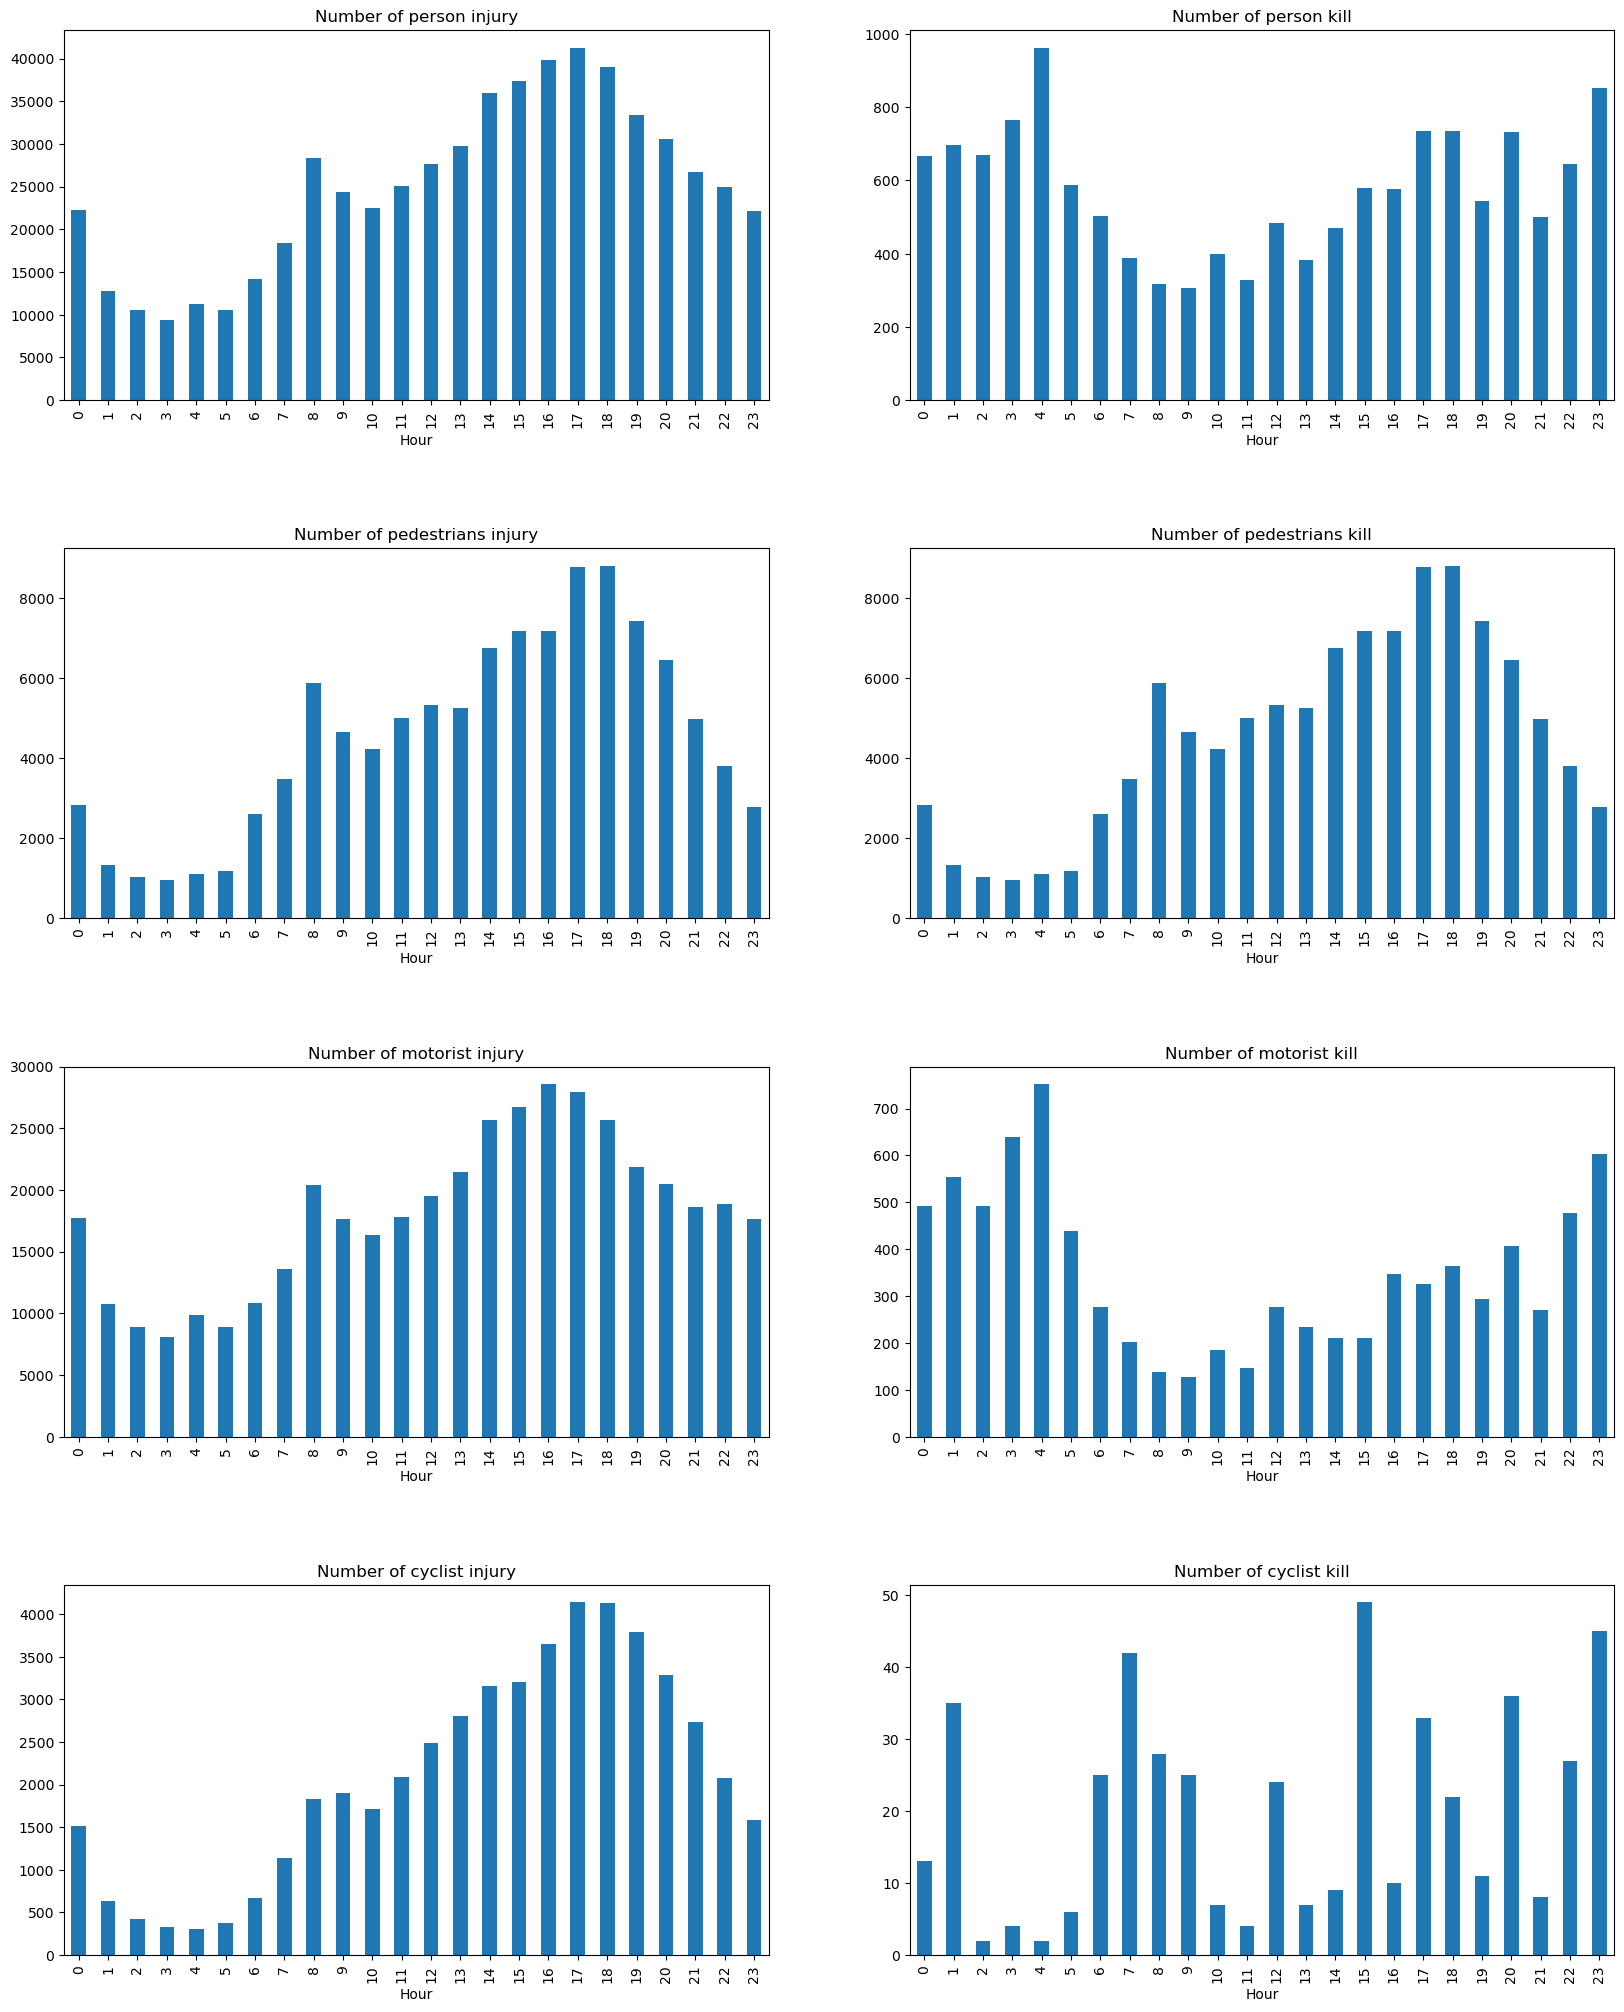

In [69]:
# Preliminary analysis
## Create bar plot by time in a day

plt.figure(figsize=(20, 25)).subplots_adjust(hspace=0.4)

## Set subplot size and space


# Looking at frequency of person injury by year
plt.subplot(4, 2 ,1)
df.groupby('Hour').TOTAL_INJURED.sum().plot.bar().set_title('Number of person injury')

# Looking at frequency of person kill by year
plt.subplot(4, 2, 2)
df.groupby('Hour').TOTAL_KILLED.sum().plot.bar().set_title('Number of person kill')

# Looking at frequency of PEDESTRIANS injury by year
plt.subplot(4, 2, 3)
df.groupby('Hour').PED_INJURED.sum().plot.bar().set_title('Number of pedestrians injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 4)
df.groupby('Hour').PED_INJURED.sum().plot.bar().set_title('Number of pedestrians kill')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 5)
df.groupby('Hour').MOTO_INJURED.sum().plot.bar().set_title('Number of motorist injury')

# Looking at frequency of pedestrians kill by year
plt.subplot(4, 2, 6)
df.groupby('Hour').MOTO_KILLED.sum().plot.bar().set_title('Number of motorist kill')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 7)
df.groupby('Hour').CYC_INJURED.sum().plot.bar().set_title('Number of cyclist injury')

# Looking at frequency of pedesstrians kill by year
plt.subplot(4, 2, 8)
df.groupby('Hour').CYC_KILLED.sum().plot.bar().set_title('Number of cyclist kill')

# Create summary table by time in a day
# df.groupby('Hour').sum()[["TOTAL_INJURED", "TOTAL_KILLED", "PED_INJURED", "PED_KILLED", 
#                                 "MOTO_INJURED", "MOTO_KILLED", "CYC_INJURED", "CYC_KILLED"]]

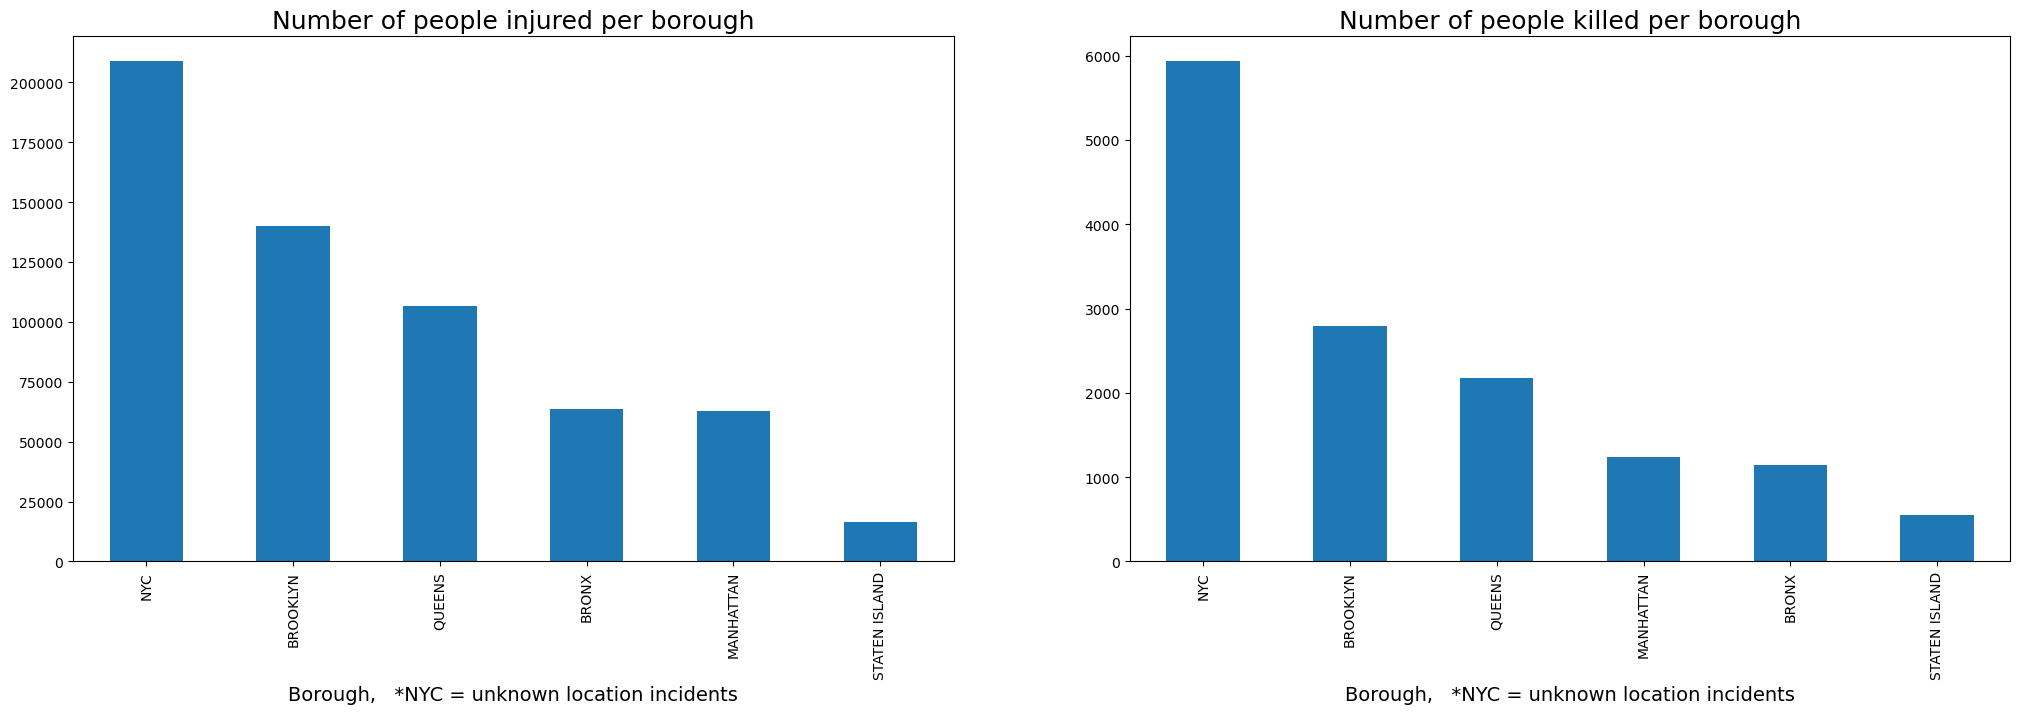

In [52]:
# Number of people injured and killed per borough

fig, ax = plt.subplots(1, figsize=(25, 15))

plt.subplot(2, 2 ,1)
df.groupby('BOROUGH').TOTAL_INJURED.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people injured per borough', fontsize=18)
plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('BOROUGH').TOTAL_KILLED.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of people killed per borough', fontsize=18)
plt.xlabel('Borough,   *NYC = unknown location incidents', fontsize=14)

plt.show()

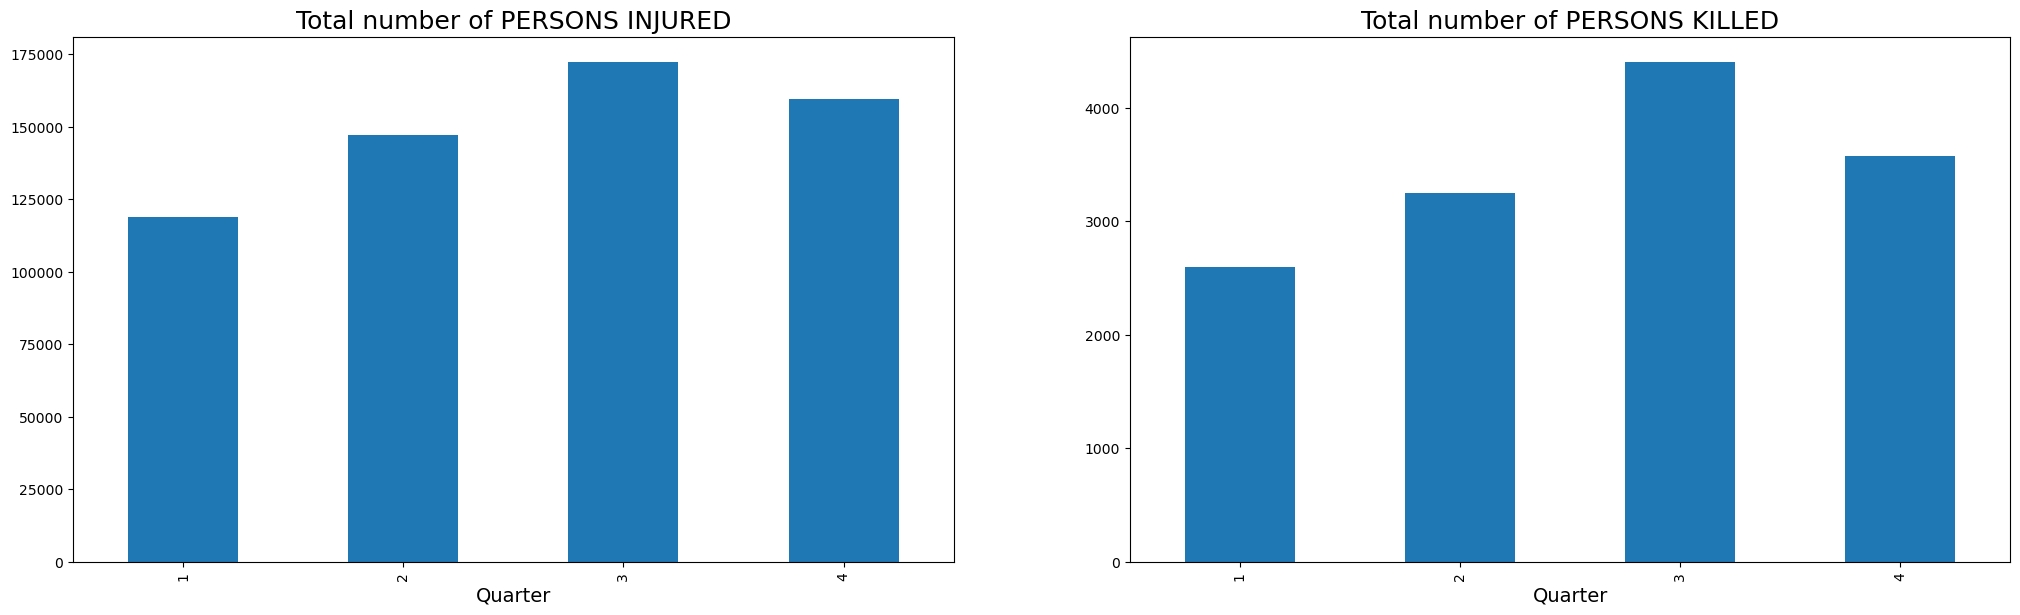

In [53]:
# Per quarter analysis
# Total number of injured and killed per quarter
fig, ax = plt.subplots(1, figsize=(25, 15))

plt.subplot(2, 2 ,1)
df.groupby('DATE_QUARTER').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED', fontsize=18)
plt.xlabel('Quarter', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('DATE_QUARTER').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED', fontsize=18)
plt.xlabel('Quarter', fontsize=14)

plt.show()

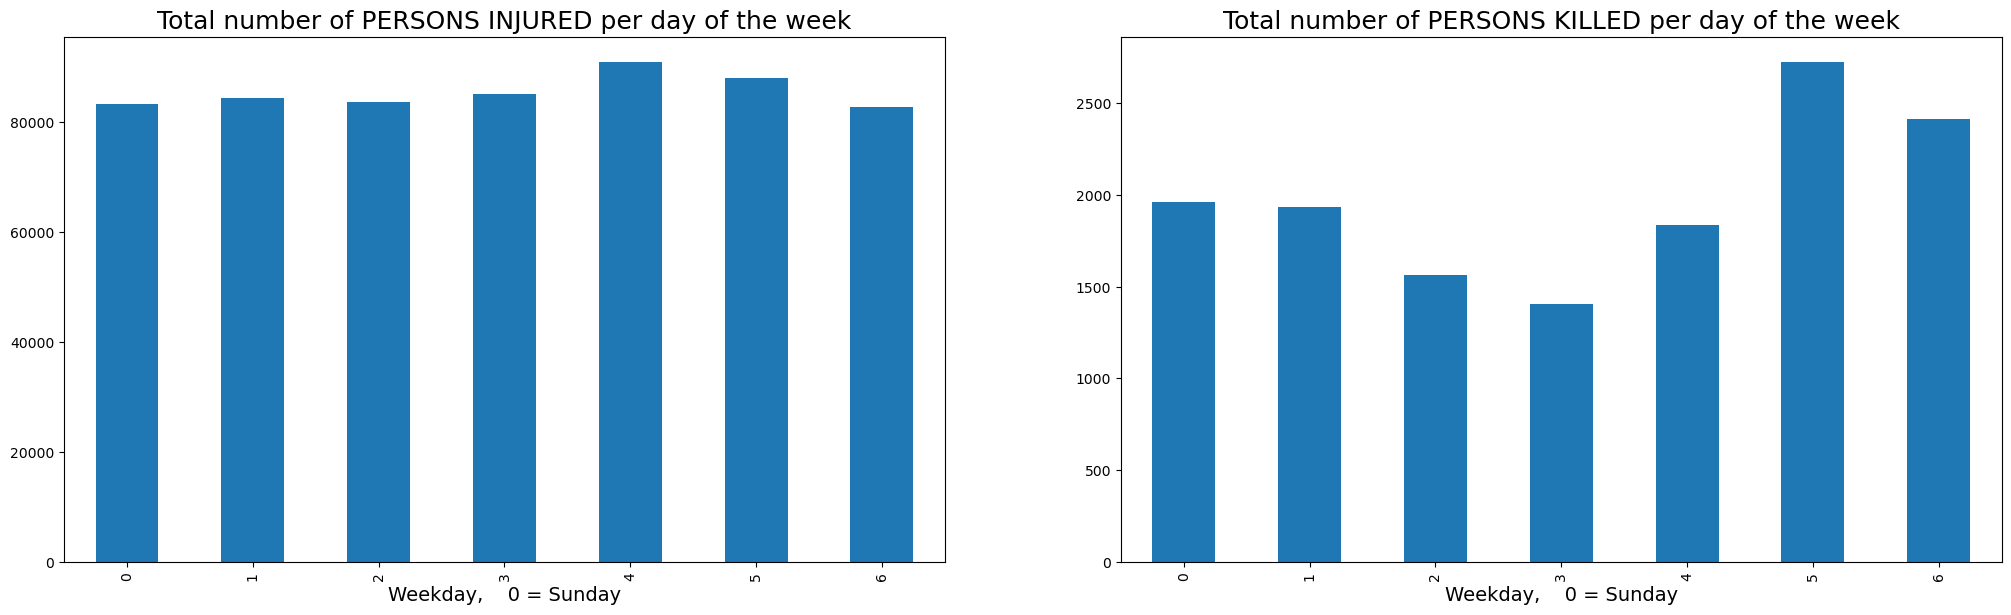

In [54]:
# Day of the week analysis
# Total number of injured and killed per quarter
fig, ax = plt.subplots(1, figsize=(25, 15))
plt.subplot(2, 2 ,1)
df.groupby('WEEKDAY').TOTAL_INJURED.sum().plot.bar()
plt.title('Total number of PERSONS INJURED per day of the week', fontsize=18)
plt.xlabel('Weekday,    0 = Sunday', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('WEEKDAY').TOTAL_KILLED.sum().plot.bar()
plt.title('Total number of PERSONS KILLED per day of the week', fontsize=18)
plt.xlabel('Weekday,    0 = Sunday', fontsize=14)

plt.show()